<a href="https://colab.research.google.com/github/TAUforPython/machinelearning/blob/main/example%20LLM%20vec2text%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Линейный классификатор (Ridge) - векторизация текста


Необходимо провести классификацию бактерий. Есть два класса опасен для человека или не опасен для человека экземпляр из класса.

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import linear_model

In [3]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [5]:
df_link ='https://github.com/TAUforPython/BioMedAI/raw/refs/heads/main/test_datasets/bacteria_list_200.csv'

df = pd.read_csv(df_link, delimiter = ';')

df.head(10)

,Name,Family,Where Found,Harmful to Humans
0,Escherichia coli,Enterobacteriaceae,Intestinal tract,Yes
1,Staphylococcus aureus,Staphylococcaceae,"Skin, nasal passages",Yes
2,Lactobacillus acidophilus,Lactobacillaceae,Human mouth & intestine,No
3,Bacillus subtilis,Bacillaceae,Soil,No
4,Clostridium botulinum,Clostridiaceae,"Soil, improperly canned foods",Yes
5,Streptococcus pneumoniae,Streptococcaceae,"Throat, nasal passages",Yes
6,Pseudomonas aeruginosa,Pseudomonadaceae,"Soil, water, skin flora",Yes
7,Mycobacterium tuberculosis,Mycobacteriaceae,Lungs,Yes
8,Vibrio cholerae,Vibrionaceae,Contaminated water,Yes
9,Salmonella enterica,Enterobacteriaceae,Intestinal tract,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name               199 non-null    object
 1   Family             199 non-null    object
 2   Where Found        199 non-null    object
 3   Harmful to Humans  199 non-null    object
dtypes: object(4)
memory usage: 6.3+ KB


In [7]:
df['Harmful to Humans'] = df['Harmful to Humans'].str.replace('Yes', '1').str.replace('No', '0').str.replace(' 1', '1')
df['Harmful to Humans'].unique()

array(['1', '0'], dtype=object)

In [8]:
df['Harmful to Humans'] = df['Harmful to Humans'].astype('int')

Проведем векторизацию текста

In [9]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['Name']).toarray()
X_train_counts.shape

(199, 352)

In [10]:
df_output_1 = pd.DataFrame(data = X_train_counts, columns = count_vect.get_feature_names_out())
len(df_output_1)

199

In [11]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['Family']).toarray()
X_train_counts.shape
df_output_2 = pd.DataFrame(data = X_train_counts, columns = count_vect.get_feature_names_out())
len(df_output_2)

199

In [12]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['Where Found']).toarray()
X_train_counts.shape
df_output_3 = pd.DataFrame(data = X_train_counts, columns = count_vect.get_feature_names_out())
len(df_output_3)

199

199


<Axes: >

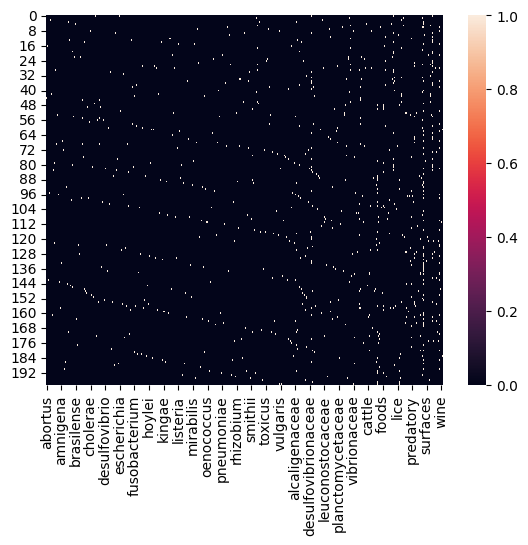

In [17]:
X = pd.concat([df_output_1, df_output_2, df_output_3], axis=1)
print(len(X))

sns.heatmap(X)

Разделим на тренировочную и тестовую выборки и проведем классификацию

In [18]:
Y = df['Harmful to Humans']
X = X

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    random_state=42,
                                                    test_size=0.2,
                                                    stratify=Y)

In [20]:
model = linear_model.RidgeClassifier(random_state=42)
model.fit(X_train, Y_train)

RidgeClassifier(random_state=42)

Confusion matrix, without normalization
[[18  3]
 [ 3 16]]


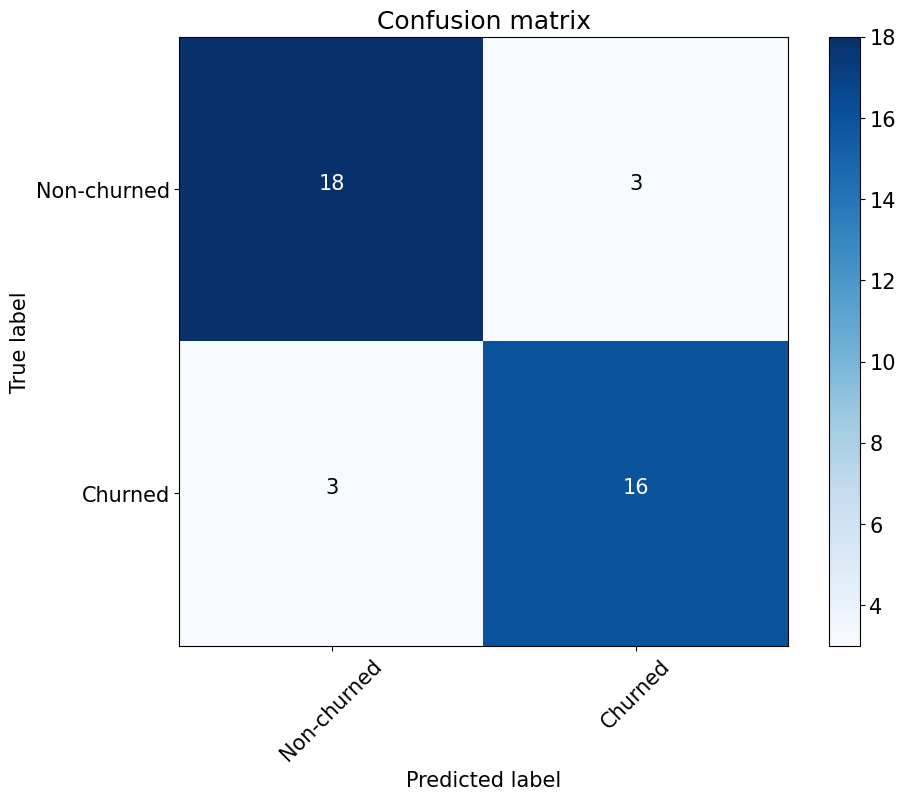

In [21]:
font = {'size' : 15}

plt.rc('font', **font)

cnf_matrix = confusion_matrix(Y_test, model.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Non-churned', 'Churned'],
                      title='Confusion matrix')
plt.savefig("conf_matrix.png")
plt.show()

In [22]:
print(classification_report(Y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        81
           1       1.00      1.00      1.00        78

    accuracy                           1.00       159
   macro avg       1.00      1.00      1.00       159
weighted avg       1.00      1.00      1.00       159



In [23]:
print(classification_report(Y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        21
           1       0.84      0.84      0.84        19

    accuracy                           0.85        40
   macro avg       0.85      0.85      0.85        40
weighted avg       0.85      0.85      0.85        40

